# Train Model

In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import dump

In [2]:
DATA_DIRECTORY = os.path.join("..", "data")

In [3]:
file_path = os.path.join(DATA_DIRECTORY, 'normalized_training_data_summary.csv')
df = pd.read_csv(file_path)
df.head()

,name,number,length,sample_rate,mfccs,chroma,mel,contrast,tonnetz
0,andrew_tate,1,252633,32000,0.704921,0.623512,0.526682,0.854140,0.044352
1,andrew_tate,10,229227,32000,0.732798,0.665359,0.440998,0.855167,-0.026122
2,andrew_tate,11,328423,32000,0.725449,0.611552,0.467615,0.903398,0.029123
3,andrew_tate,12,335110,32000,0.705710,0.640897,0.482669,0.877912,-0.062082
4,andrew_tate,13,260806,32000,0.705736,0.647412,0.369456,0.859094,-0.026114


In [4]:
# Separate features and target variable
X = df[['mfccs', 'chroma', 'mel', 'contrast', 'tonnetz']]
y = df['name']  # or whatever your target variable is

# Flatten your features if they are in lists or arrays within the DataFrame
# Example for a single feature column:
# X['mfccs'] = X['mfccs'].apply(lambda x: np.array(x).flatten())

# Split into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# Initialize
model = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Retrieve the best model from the grid search
best_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Model Accuracy: {accuracy}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best Model Accuracy: 0.984375


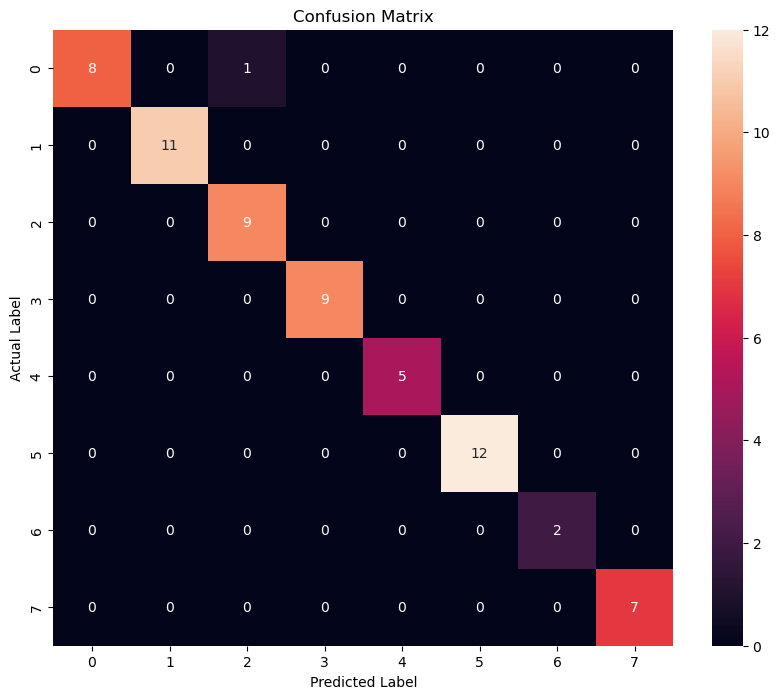

Classification Report:
                      precision    recall  f1-score   support

        andrew_tate       1.00      0.89      0.94         9
       donald_trump       1.00      1.00      1.00        11
         kanye_west       0.90      1.00      0.95         9
     kendrick_lamar       1.00      1.00      1.00         9
      marge_simpson       1.00      1.00      1.00         5
     morgan_freeman       1.00      1.00      1.00        12
          spongebob       1.00      1.00      1.00         2
squidward_tentacles       1.00      1.00      1.00         7

           accuracy                           0.98        64
          macro avg       0.99      0.99      0.99        64
       weighted avg       0.99      0.98      0.98        64



In [6]:
# Predict on the test set
y_pred = best_model.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

In [7]:
model_file_path = os.path.join(DATA_DIRECTORY, 'model.joblib')
dump(best_model, model_file_path)

['..\\data\\model.joblib']